# Lab 1: Part B: Maximum a Posteriori
In this part of the lab we will find a maximum a posteriori (MAP) solution. This allows us to introduce _prior_ information we may have about the parameters. Since we're opting to use a prior, we will need to pick one! For that we will use the Normal Inverse Gamma distribution as our conjugate prior.

PLEASE limit your use of built-in functions. Use of the built-in scipy `gamma_function` function is ok, but not more specific or convenience-focused shortcut functions like `scipy.stats.norm.pdf` etc. The aim is that you implement some of these functions yourself rather than blindly using built-ins.

In [27]:
%load_ext autoreload
%autoreload 2

# For matrices
import numpy as np

# For plotting
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 25)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('font', size=15)

# Our custom modules
from normal import *
from log_normal import *
from normal_inv_gamma import *
from plot_normal import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
# Generate some data points from a normal distribution
mu = 1     # mean
sigma = 2  # standard deviation = sqrt(variance)
N = 5      # number of datapoints

X = mu + sigma*np.random.randn(N,1)

In [74]:
# hyperparameters for prior - normal inverse gamma
alpha = 1
beta = 1
gamma = 1
delta = 0

## MAP Parameter Estimation of univariate normal

### TODO 1 
On paper derive (or consult the lecture notes for) the MAP parameter estimates for the normal distribution using the normal inverse gamma prior and then insert the equations below. You can copy your answers for the ML solution from `prac1_a.ipynb`.

In [82]:
# Change the zeros to their appropriate equations.
muML = np.mean(X)     # So put your answer here in place of zero.
squareSigML = np.mean((X - muML)**2)
sigmaML = np.sqrt(squareSigML) 
muMAP = (np.sum(X) + gamma * delta) / (N + gamma)
squareSigMAP = (np.sum((X - muMAP) ** 2) + 2 * beta + gamma * (delta - muMAP) ** 2) / (N + 3 + 2 * alpha)
sigmaMAP = np.sqrt(squareSigMAP) 

Estimated ML Mean: 1.28
Estimated ML Standard Deviation: 1.08

Estimated MAP Mean: 1.07
Estimated MAP Standard Deviation: 0.96


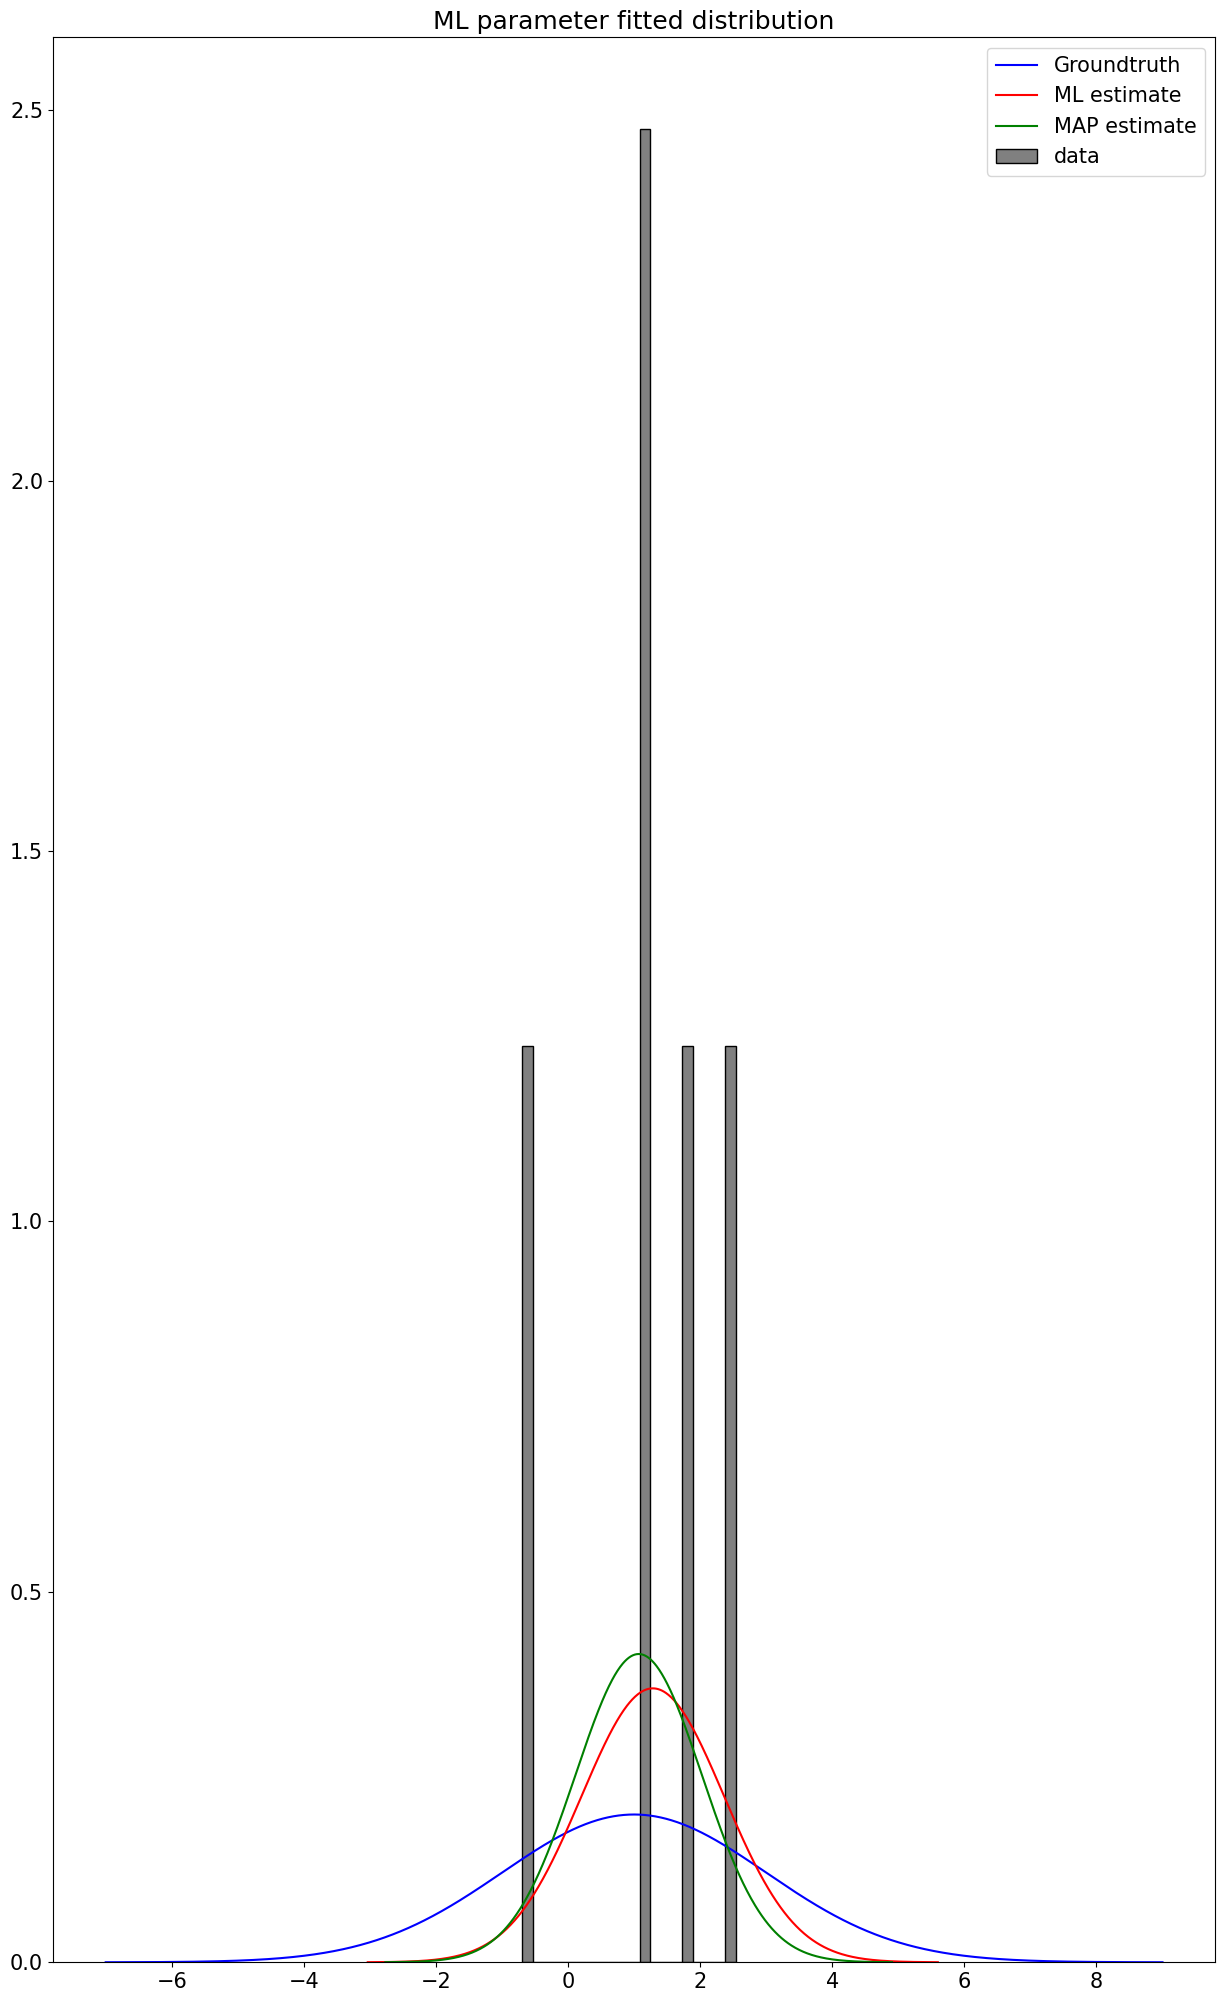

In [83]:
print("Estimated ML Mean: " + "{:.2f}".format(muML))
print("Estimated ML Standard Deviation: " + "{:.2f}".format(sigmaML))
print("")
print("Estimated MAP Mean: " + "{:.2f}".format(muMAP))
print("Estimated MAP Standard Deviation: " + "{:.2f}".format(sigmaMAP))

# Plotting univariate normal
# Normalizing histograms - assuming bins are evenly sized
[hist_count, bin_edges] = np.histogram(X, 20)
bin_width = bin_edges[1] - bin_edges[0]
hist_pos = (bin_edges[1:] + bin_edges[:-1]) / 2.

# Plot figure
plt.bar(bin_edges[:-1], hist_count/(np.sum(hist_count)*bin_width), color='gray', 
        edgecolor='k', width=bin_width, label='data')
plot_normal(mu, sigma, 'b', 'Groundtruth')
plot_normal(muML, sigmaML, 'r', 'ML estimate')
plot_normal(muMAP, sigmaMAP, 'g', 'MAP estimate')
plt.legend()
plt.title('ML parameter fitted distribution')
plt.show()

## Empirical Confirmation

Now the fun part! You've calculated the closed form solution for maximum a posteriori (MAP). We're now going to implement a brute force solution like we did in `prac1_a.ipynb` and see if we get the same answer.

### Note
Again the __TODOs__ are calling for you to dig into the functions called within the for-loops. You should have already completed the function `normal` in `prac1_a`. 


### TODO 2
Compute the probability density for the prior: See `normal_inv_gamma.py`

In [85]:
# Domain of likelihood function
sigma_range = np.linspace(0.02, 2., num=200)
mu_range = np.linspace(-2., 2., num=400)

# Brute force compute the likelihood prior functions
lfun = np.zeros((len(sigma_range), len(mu_range)))
prior = np.zeros((len(sigma_range), len(mu_range)))

for i, m in enumerate(mu_range):
    for j, s in enumerate(sigma_range):
        lfun[j,i] = normal(X, m, s)
        prior[j,i] = normal_inv_gamma(alpha, beta, delta, gamma, m, s)

### TODO 4 
Last step! Compute the posterior using Bayes rule.

In [87]:
# Change the zeros to the appropriate equation.
posterior = np.zeros((len(sigma_range), len(mu_range)))
for i, m in enumerate(mu_range):
    for j, s in enumerate(sigma_range):
        posterior[j][i] = lfun[j,i] * prior[j,i]

### TODO 5
Empirically verify that the maximum of the posterior is at the same position as your MAP solution.

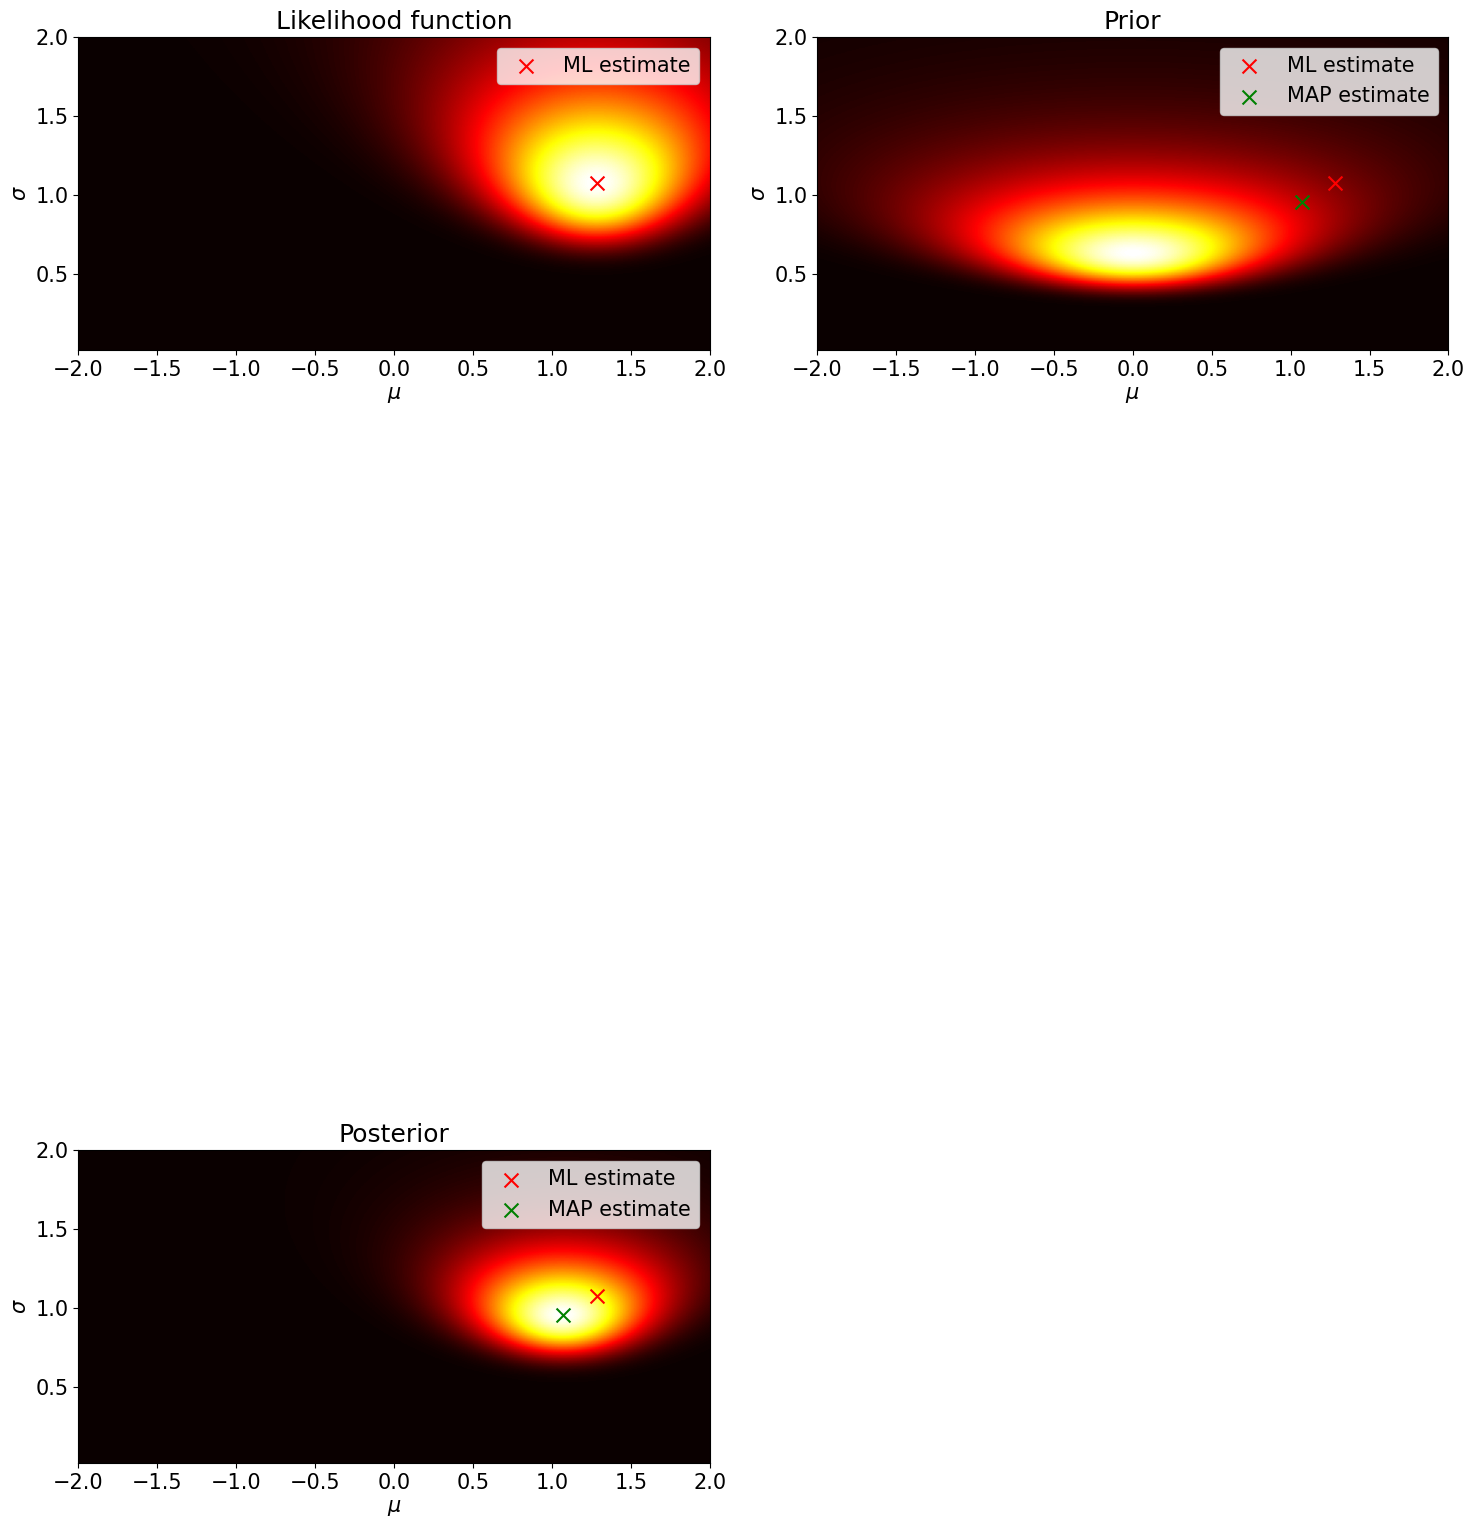

: 

In [90]:
# Plot likelihood function
plt.subplot(2,2,1)
plt.imshow(lfun, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Likelihood function")

## Plot points
plt.scatter(muML, sigmaML, color='r', marker='x', s=100, label='ML estimate')
plt.legend()



# Plot prior
plt.subplot(2,2,2)
plt.imshow(prior, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Prior")

plt.scatter(muML, sigmaML, color='r', marker='x', s=100, label='ML estimate')
plt.scatter(muMAP, sigmaMAP, color='g', marker='x', s=100, label='MAP estimate')
plt.legend()

# Plot posterior
plt.subplot(2,2,3)
plt.imshow(posterior, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Posterior")

## Plot points
plt.scatter(muML, sigmaML, color='r', marker='x', s=100, label='ML estimate')
plt.scatter(muMAP, sigmaMAP, color='g', marker='x', s=100, label='MAP estimate')
plt.legend()


# Prevent subplots from bunching up
plt.tight_layout()

### TODO 6
Comment on the effects of introducing the prior as the number of datapoints is low as compared to high.
 

In [ ]:
'''
When datapoints is higher, it will do better that using the maxium likelihoood method in fiting the the data

When using MAP (Maximum A Posteriori) for predicting the parameters of a probability distribution, the impact of introducing a prior distribution is influenced by the number of data points, with distinctions between low and high data quantities.
When the number of data points is low:
1\Strong Prior Influence: In cases with a low number of data points, the impact of the prior distribution is more pronounced. Due to the limited information in the data, the model relies more on the prior distribution to provide information about the parameters. If the prior distribution is strong, it may dominate the posterior distribution, leading to parameter estimates deviating from the true values.
2\Increased Uncertainty: With fewer data points, estimation uncertainty increases. Because we have limited data, our estimates of the parameters are less precise, resulting in a posterior distribution that is broader and encompasses more uncertainty.

When the number of data points is high:
1\Data Dominance: As the number of data points increases, the influence of the data becomes more significant. Abundant data facilitates more accurate parameter estimation, and the impact of the prior distribution becomes relatively less pronounced.
2\Diminished Prior Influence: The impact of the prior distribution decreases relative to the data. Even if the prior distribution exhibits some preference for certain parameter values, the influence of a large amount of data tends to counterbalance these preferences, leading to estimates that converge more towards the true distribution in the data.

Convergence to Empirical Distribution: With an increasing number of data points, the posterior distribution often converges to closely match the empirical distribution of the data. This indicates that our estimates of the parameters are more influenced by the data itself, rather than solely by the prior.

'''